## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import warnings


In [10]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')


## Loading the dataset

In [53]:
df = pd.read_csv('C:/Intel/Train.csv')
df.shape

(8068, 11)

In [7]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


### Number of unique values in data

In [8]:
df.nunique()

ID                 8068
Gender                2
Ever_Married          2
Age                  67
Graduated             2
Profession            9
Work_Experience      15
Spending_Score        3
Family_Size           9
Var_1                 7
Segmentation          4
dtype: int64

### Drop the id column

In [54]:
df.drop(columns=['ID'],inplace=True)

In [12]:
df.shape

(8068, 10)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8068 non-null   object 
 1   Ever_Married     7928 non-null   object 
 2   Age              8068 non-null   int64  
 3   Graduated        7990 non-null   object 
 4   Profession       7944 non-null   object 
 5   Work_Experience  7239 non-null   float64
 6   Spending_Score   8068 non-null   object 
 7   Family_Size      7733 non-null   float64
 8   Var_1            7992 non-null   object 
 9   Segmentation     8068 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 630.4+ KB


### Number of unique values in data

In [14]:
df.nunique()

Gender              2
Ever_Married        2
Age                67
Graduated           2
Profession          9
Work_Experience    15
Spending_Score      3
Family_Size         9
Var_1               7
Segmentation        4
dtype: int64

In [24]:
df.Ever_Married.unique()

array(['No', 'Yes', nan], dtype=object)

In [23]:
df.Graduated.unique()

array(['No', 'Yes', nan], dtype=object)

In [22]:
df.Work_Experience.unique()

array([ 1., nan,  0.,  4.,  9., 12.,  3., 13.,  5.,  8., 14.,  7.,  2.,
        6., 10., 11.])

In [21]:
df.Spending_Score.unique()

array(['Low', 'Average', 'High'], dtype=object)

In [15]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [17]:
df.Segmentation.unique()

array(['D', 'A', 'B', 'C'], dtype=object)

In [18]:
df.Var_1.unique()

array(['Cat_4', 'Cat_6', 'Cat_7', 'Cat_3', 'Cat_1', 'Cat_2', nan, 'Cat_5'],
      dtype=object)

In [19]:
df.Family_Size.unique()

array([ 4.,  3.,  1.,  2.,  6., nan,  5.,  8.,  7.,  9.])

In [20]:
df.Profession.unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing', nan], dtype=object)

### Checking the null values in dataset

In [25]:
df.isnull().sum()

Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [26]:
(df.isnull().sum()/len(df))*100

Gender              0.000000
Ever_Married        1.735250
Age                 0.000000
Graduated           0.966782
Profession          1.536936
Work_Experience    10.275161
Spending_Score      0.000000
Family_Size         4.152206
Var_1               0.941993
Segmentation        0.000000
dtype: float64

In [27]:
df.isnull().sum().sum()

np.int64(1582)

### apply dropna method to remove null values

In [55]:
df.dropna(inplace=True)

In [29]:
df.isnull().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [56]:
df.shape

(6665, 10)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6665 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           6665 non-null   object 
 1   Ever_Married     6665 non-null   object 
 2   Age              6665 non-null   int64  
 3   Graduated        6665 non-null   object 
 4   Profession       6665 non-null   object 
 5   Work_Experience  6665 non-null   float64
 6   Spending_Score   6665 non-null   object 
 7   Family_Size      6665 non-null   float64
 8   Var_1            6665 non-null   object 
 9   Segmentation     6665 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 572.8+ KB


### Checking the skewness of data

In [38]:
from scipy import stats

In [37]:
num_df = df.select_dtypes(include='number')

Skewness of Age: 0.684859998741693


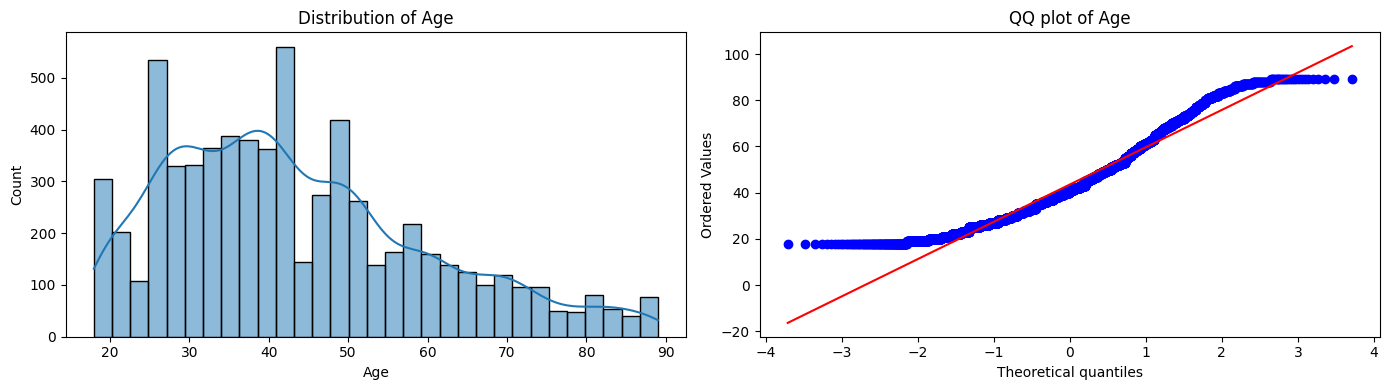

Skewness of Work_Experience: 1.3243597752021483


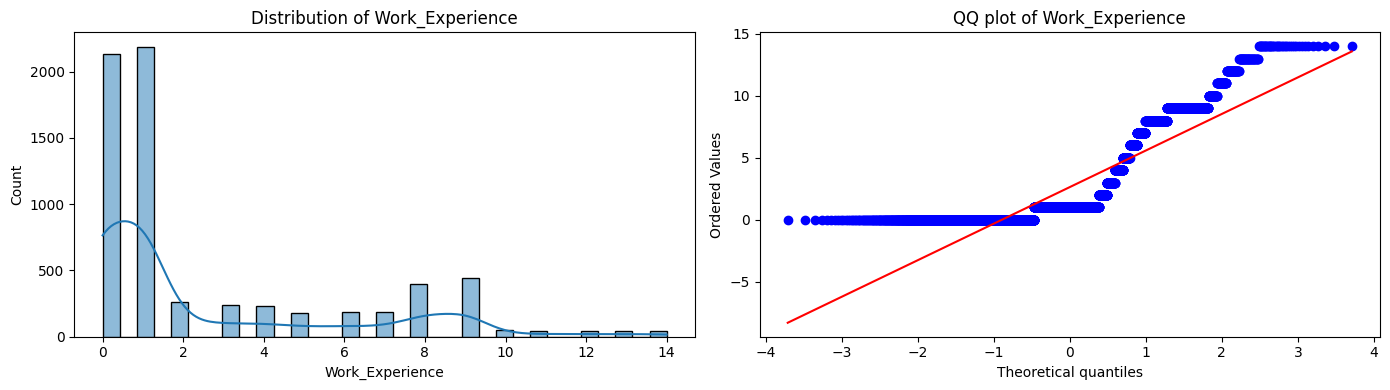

Skewness of Family_Size: 1.0258856078867193


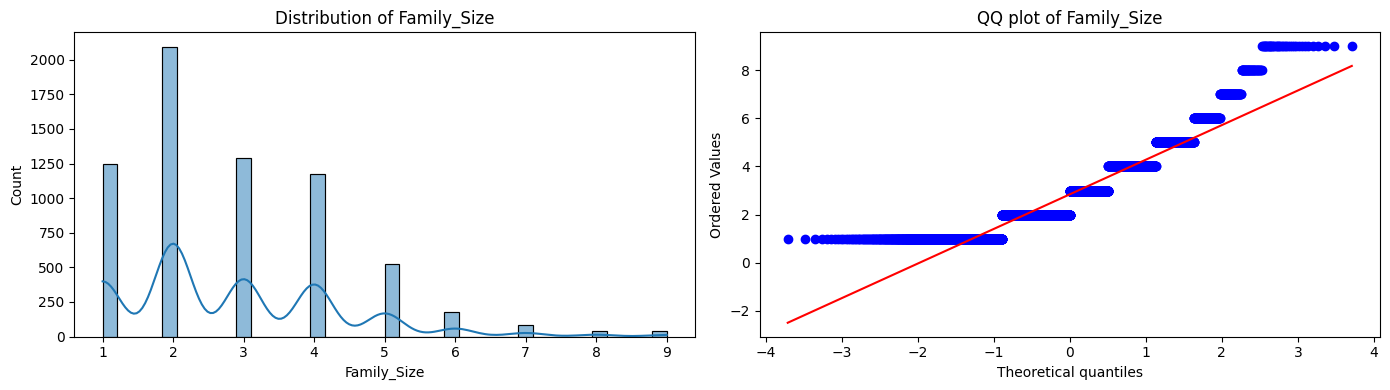

In [39]:
for col in num_df.columns:
    skewness = df[col].skew()
    print(f'Skewness of {col}: {skewness}')
    
    plt.figure(figsize=(14, 4))

    # Distribution plot
    plt.subplot(121)
    sns.histplot(num_df[col], kde=True)  # Changed to histplot
    plt.title(f'Distribution of {col}')

    # QQ plot
    plt.subplot(122)
    stats.probplot(num_df[col], dist='norm', plot=plt)
    plt.title(f'QQ plot of {col}')

    plt.tight_layout()
    plt.show()

### Outliers detection and removing

<Axes: ylabel='Work_Experience'>

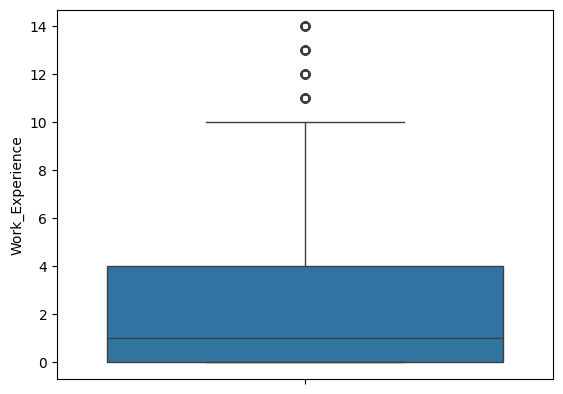

In [33]:
sns.boxplot(df['Work_Experience'])

In [68]:
# finding the IQR
q1 = df['Work_Experience'].quantile(0.25)
q3 = df['Work_Experience'].quantile(0.75)
print(q1)
print(q3)

iqr = q3-q1
print("IQR is ",iqr)
# define the upper and lower liit
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print('upper limit ',upper_limit)
print('lower limit ',lower_limit)

outlier = df[df['Work_Experience'] > upper_limit]
print("length of outliers on upper bound ",len(outlier))


outlier = df[df['Work_Experience'] < lower_limit]
print("length of outliers on lower bound ",len(outlier))

0.0
4.0
IQR is  4.0
upper limit  10.0
lower limit  -6.0
length of outliers on upper bound  176
length of outliers on lower bound  0


In [69]:
new_df = df[df['Work_Experience'] < upper_limit]
print(new_df.shape)

(6438, 10)


<Axes: ylabel='Work_Experience'>

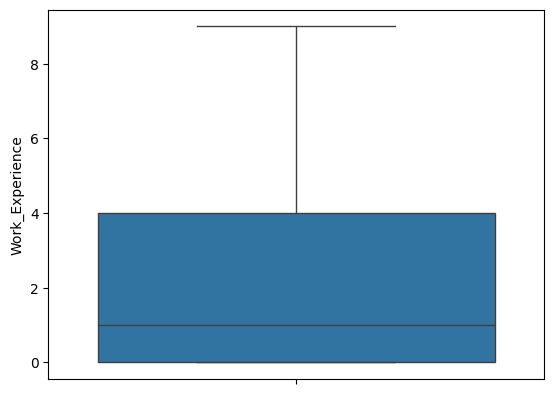

In [70]:
sns.boxplot(new_df['Work_Experience'])

#### Now in column `Age`

<Axes: ylabel='Age'>

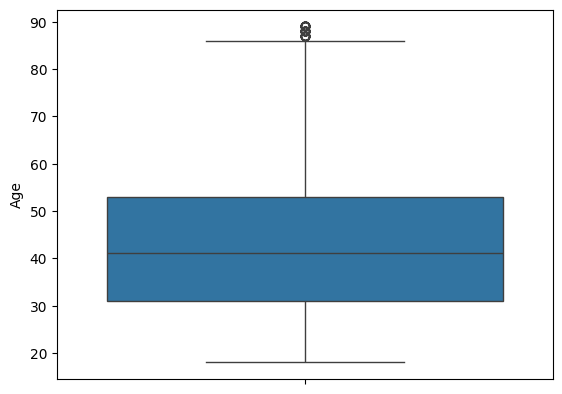

In [71]:
sns.boxplot(new_df['Age'])

In [73]:
# finding the IQR
q1 = new_df['Age'].quantile(0.25)
q3 = new_df['Age'].quantile(0.75)
print(q1)
print(q3)

iqr = q3-q1
print("IQR is ",iqr)
# define the upper and lower liit
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print('upper limit ',upper_limit)
print('lower limit ',lower_limit)

outlier = new_df[new_df['Age'] > upper_limit]
print("length of outliers on upper bound ",len(outlier))


outlier = new_df[new_df['Age'] < lower_limit]
print("length of outliers on lower bound ",len(outlier))

31.0
53.0
IQR is  22.0
upper limit  86.0
lower limit  -2.0
length of outliers on upper bound  75
length of outliers on lower bound  0


In [74]:
df = new_df[new_df['Age'] < upper_limit]
print(df.shape)

(6340, 10)


<Axes: ylabel='Age'>

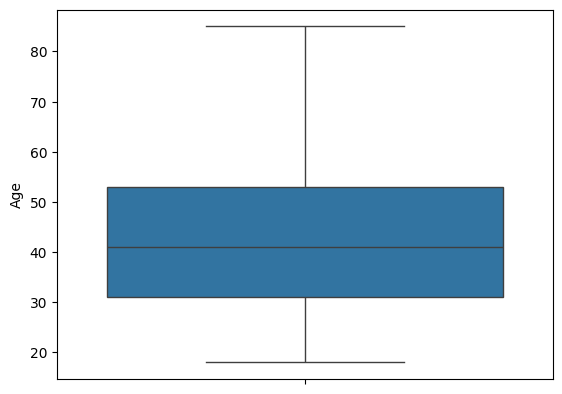

In [75]:
sns.boxplot(df['Age'])

### Now in column Family_Size

<Axes: ylabel='Family_Size'>

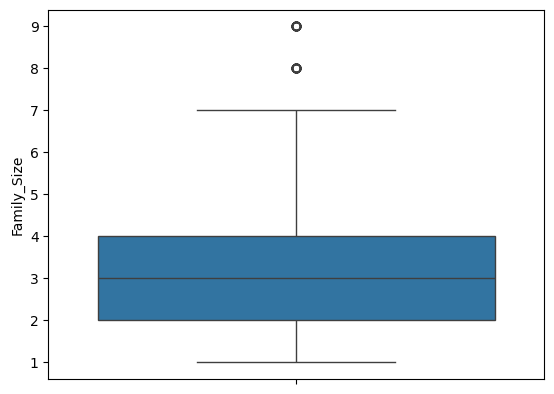

In [78]:
sns.boxplot(df['Family_Size'])

In [77]:
# finding the IQR
q1 = df['Family_Size'].quantile(0.25)
q3 = df['Family_Size'].quantile(0.75)
print(q1)
print(q3)

iqr = q3-q1
print("IQR is ",iqr)
# define the upper and lower liit
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print('upper limit ',upper_limit)
print('lower limit ',lower_limit)

outlier = df[df['Family_Size'] > upper_limit]
print("length of outliers on upper bound ",len(outlier))


outlier = df[df['Family_Size'] < lower_limit]
print("length of outliers on lower bound ",len(outlier))

2.0
4.0
IQR is  2.0
upper limit  7.0
lower limit  -1.0
length of outliers on upper bound  75
length of outliers on lower bound  0


In [80]:
new_df = df[df['Family_Size'] < upper_limit]
print(new_df.shape)

(6186, 10)


<Axes: ylabel='Family_Size'>

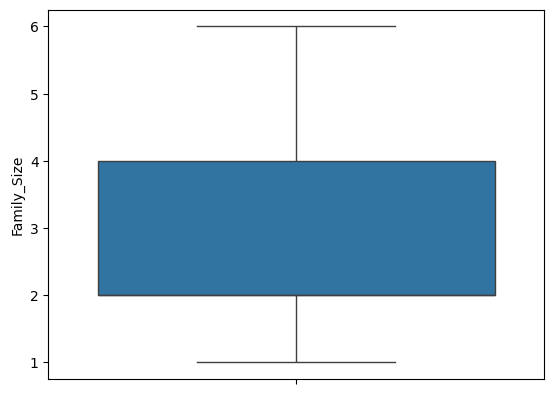

In [81]:
sns.boxplot(new_df['Family_Size'])

In [87]:
new_df.to_csv("Umar Attique.csv")

### Main Filee

In [32]:
df = pd.read_csv("Umar Attique.csv")

In [33]:
df.shape

(6186, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6186 entries, 0 to 6185
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       6186 non-null   int64  
 1   Gender           6186 non-null   object 
 2   Ever_Married     6186 non-null   object 
 3   Age              6186 non-null   int64  
 4   Graduated        6186 non-null   object 
 5   Profession       6186 non-null   object 
 6   Work_Experience  6186 non-null   float64
 7   Spending_Score   6186 non-null   object 
 8   Family_Size      6186 non-null   float64
 9   Var_1            6186 non-null   object 
 10  Segmentation     6186 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 531.7+ KB


In [34]:
df.drop(columns=['Unnamed: 0'],inplace=True)

### Applying one hot encoding on nominal categorical features

In [6]:
df.Ever_Married.value_counts(True)

Ever_Married
Yes    0.597478
No     0.402522
Name: proportion, dtype: float64

In [7]:
df.Graduated.value_counts(True)

Graduated
Yes    0.64355
No     0.35645
Name: proportion, dtype: float64

In [8]:
df.Profession.value_counts(True)

Profession
Artist           0.336243
Healthcare       0.161009
Entertainment    0.123505
Doctor           0.090204
Engineer         0.087779
Executive        0.075816
Lawyer           0.067249
Marketing        0.035079
Homemaker        0.023117
Name: proportion, dtype: float64

In [35]:
df['Profession'] = df['Profession'].replace(['Doctor','Engineer','Executive','Lawyer'],'DocEnExLaw')

df['Profession'] = df['Profession'].replace(['Marketing','Homemaker'],'MarHom')

In [36]:
df['Profession'].value_counts(True)

Profession
Artist           0.336243
DocEnExLaw       0.321048
Healthcare       0.161009
Entertainment    0.123505
MarHom           0.058196
Name: proportion, dtype: float64

In [11]:
df.Spending_Score.value_counts(True)

Spending_Score
Low        0.596347
Average    0.257840
High       0.145813
Name: proportion, dtype: float64

In [10]:
df.Var_1.value_counts(True)

Var_1
Cat_6    0.672971
Cat_4    0.123666
Cat_3    0.098125
Cat_2    0.054478
Cat_7    0.023763
Cat_1    0.016489
Cat_5    0.010508
Name: proportion, dtype: float64

In [37]:
df['Var_1'] = df['Var_1'].replace(['Cat_3','Cat_2','Cat_7','Cat_1','Cat_5'],'Minorities')

In [38]:
df['Var_1'].value_counts(True)

Var_1
Cat_6         0.672971
Minorities    0.203362
Cat_4         0.123666
Name: proportion, dtype: float64

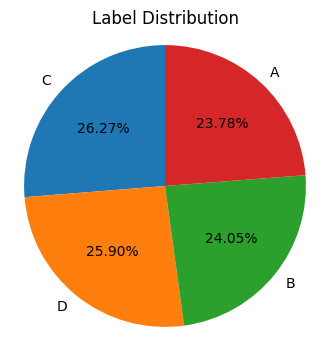

In [9]:
v_ct = df['Segmentation'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(v_ct, labels =v_ct.index, autopct = '%.2f%%', startangle = 90)
plt.axis('equal')
plt.title('Label Distribution')
plt.show()

#### Implementation 

In [37]:
df.columns

Index(['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [39]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
import pandas as pd

# Apply OneHotEncoder and OrdinalEncoder using ColumnTransformer
trf1 = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), [0, 1, 3, 4, 8]),  # OneHot on specified columns
    ('ore', OrdinalEncoder(), [6])  # Ordinal on 'Spending_Score' (index 6)
], remainder='passthrough')

# Fit and transform the dataset (excluding the 'Segmentation' column for now)
encoded_array = trf1.fit_transform(df.drop(columns=['Segmentation']))

# Apply LabelEncoder separately on the 'Segmentation' column
le = LabelEncoder()
df['Segmentation_encoded'] = le.fit_transform(df['Segmentation'])

# Convert the transformed array into a DataFrame
encoded_df = pd.DataFrame(encoded_array, columns=trf1.get_feature_names_out())

# Add the LabelEncoded 'Segmentation' column back to the DataFrame
encoded_df['Segmentation_encoded'] = df['Segmentation_encoded']

# View the first few rows of the encoded DataFrame
print(encoded_df.head())

# To view the label encoding mapping for 'Segmentation'
segmentation_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("LabelEncoder mapping for 'Segmentation':", segmentation_mapping)

# For OrdinalEncoder, you can check the assigned categories
print("OrdinalEncoder categories for 'Spending_Score':", trf1.named_transformers_['ore'].categories_)


   ohe__Gender_Female  ohe__Gender_Male  ohe__Ever_Married_No  \
0                 0.0               1.0                   1.0   
1                 1.0               0.0                   0.0   
2                 0.0               1.0                   0.0   
3                 0.0               1.0                   0.0   
4                 0.0               1.0                   1.0   

   ohe__Ever_Married_Yes  ohe__Graduated_No  ohe__Graduated_Yes  \
0                    0.0                1.0                 0.0   
1                    1.0                0.0                 1.0   
2                    1.0                0.0                 1.0   
3                    1.0                1.0                 0.0   
4                    0.0                0.0                 1.0   

   ohe__Profession_Artist  ohe__Profession_DocEnExLaw  \
0                     0.0                         0.0   
1                     0.0                         1.0   
2                     0.0          

In [17]:
encoded_df.head()

,ohe__Gender_Female,ohe__Gender_Male,ohe__Ever_Married_No,ohe__Ever_Married_Yes,ohe__Graduated_No,ohe__Graduated_Yes,ohe__Profession_Artist,ohe__Profession_DocEnExLaw,ohe__Profession_Entertainment,ohe__Profession_Healthcare,ohe__Profession_MarHom,ohe__Var_1_Cat_4,ohe__Var_1_Cat_6,ohe__Var_1_Minorities,ore__Spending_Score,remainder__Age,remainder__Work_Experience,remainder__Family_Size,Segmentation_encoded
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,22.0,1.0,4.0,3
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,67.0,1.0,1.0,1
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,67.0,0.0,2.0,1
3,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,56.0,0.0,2.0,2
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,32.0,1.0,3.0,2


In [51]:
encoded_df.columns

Index(['ohe__Gender_Female', 'ohe__Gender_Male', 'ohe__Ever_Married_No',
       'ohe__Ever_Married_Yes', 'ohe__Graduated_No', 'ohe__Graduated_Yes',
       'ohe__Profession_Artist', 'ohe__Profession_DocEnExLaw',
       'ohe__Profession_Entertainment', 'ohe__Profession_Healthcare',
       'ohe__Profession_MarHom', 'ohe__Var_1_Cat_4', 'ohe__Var_1_Cat_6',
       'ohe__Var_1_Minorities', 'ore__Spending_Score', 'remainder__Age',
       'remainder__Work_Experience', 'remainder__Family_Size',
       'Segmentation_encoded'],
      dtype='object')

In [40]:
# Replace 'remainder__', 'ohe__', and 'ore__' prefixes with an empty string
encoded_df.columns = encoded_df.columns.str.replace('remainder__', '', regex=False)
encoded_df.columns = encoded_df.columns.str.replace('ohe__', '', regex=False)
encoded_df.columns = encoded_df.columns.str.replace('ore__', '', regex=False)


In [41]:
encoded_df.head()

,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,Profession_Artist,Profession_DocEnExLaw,Profession_Entertainment,Profession_Healthcare,Profession_MarHom,Var_1_Cat_4,Var_1_Cat_6,Var_1_Minorities,Spending_Score,Age,Work_Experience,Family_Size,Segmentation_encoded
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,22.0,1.0,4.0,3
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,67.0,1.0,1.0,1
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,67.0,0.0,2.0,1
3,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,56.0,0.0,2.0,2
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,32.0,1.0,3.0,2


In [20]:
encoded_df.columns

Index(['Gender_Female', 'Gender_Male', 'Ever_Married_No', 'Ever_Married_Yes',
       'Graduated_No', 'Graduated_Yes', 'Profession_Artist',
       'Profession_DocEnExLaw', 'Profession_Entertainment',
       'Profession_Healthcare', 'Profession_MarHom', 'Var_1_Cat_4',
       'Var_1_Cat_6', 'Var_1_Minorities', 'Spending_Score', 'Age',
       'Work_Experience', 'Family_Size', 'Segmentation_encoded'],
      dtype='object')

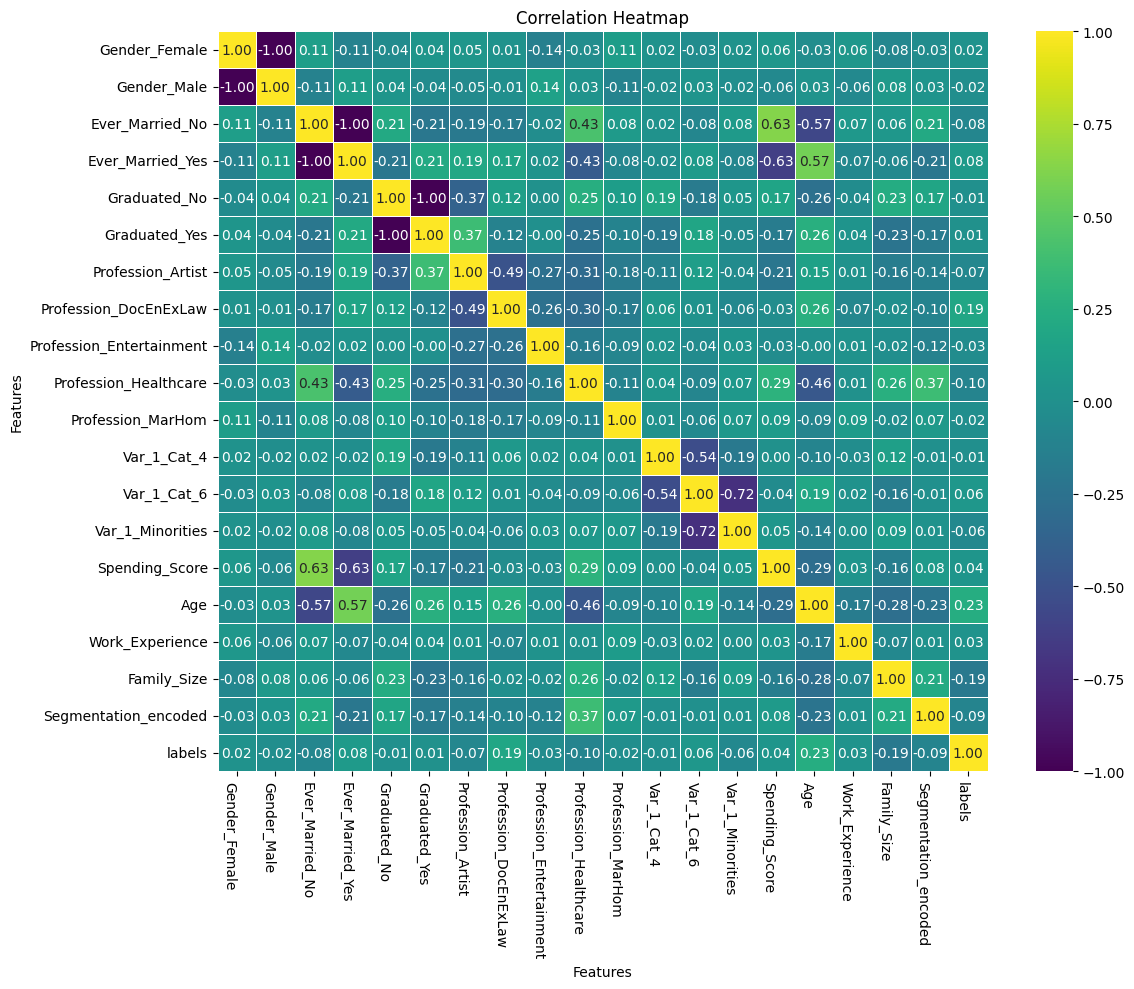

In [30]:
# Compute the correlation matrix
corr = encoded_df.corr()

# Create a new figure for plotting
plt.figure(figsize=(12, 10))  # Set the figure size

# Create the heatmap with Seaborn
sns.heatmap(corr, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)  # Customize the plot

# Add labels and title
plt.xlabel('Features')
plt.ylabel('Features')
plt.title('Correlation Heatmap')

# Rotate x-axis labels for better readability
plt.xticks(rotation=-90, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

### Separatineg features

In [58]:
x = encoded_df.drop('Segmentation_encoded',axis=1)
y = encoded_df['Segmentation_encoded']

In [59]:
x.shape,y.shape

((6186, 18), (6186,))

### Train Test Split

In [61]:
#Importing our ML toolkit
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.svm import SVC


from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, y_train.shape,x_test.shape,y_test.shape

((4948, 18), (4948,), (1238, 18), (1238,))

### Scalling the data

In [71]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [72]:
x_train=pd.DataFrame(x_train,columns=x.columns)
x_train.head()

,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,Profession_Artist,Profession_DocEnExLaw,Profession_Entertainment,Profession_Healthcare,Profession_MarHom,Var_1_Cat_4,Var_1_Cat_6,Var_1_Minorities,Spending_Score,Age,Work_Experience,Family_Size
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.000000,0.000000,0.4
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.582090,0.000000,0.0
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.044776,0.111111,0.8
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.865672,0.111111,0.0
4,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.522388,0.666667,0.2


### DecisionTreeClassifier


In [73]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy = np.round(accuracy_score(y_pred,y_test)*100,2)
accuracy

c:\Users\Umar Attique\anaconda3\envs\my_ml_project\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


np.float64(42.97)

### RandomForestClassifier

In [74]:
model = RandomForestClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy = np.round(accuracy_score(y_pred,y_test)*100,2)
accuracy

c:\Users\Umar Attique\anaconda3\envs\my_ml_project\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


np.float64(46.85)

### GradientBoostingClassifer

In [75]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy = np.round(accuracy_score(y_pred,y_test)*100,2)
accuracy

c:\Users\Umar Attique\anaconda3\envs\my_ml_project\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


np.float64(53.23)

### KNeighborsClassifier

In [76]:
model = KNeighborsClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy = np.round(accuracy_score(y_pred,y_test)*100,2)
accuracy

c:\Users\Umar Attique\anaconda3\envs\my_ml_project\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


np.float64(46.28)

### AdaBoostClassifier

In [77]:
model = AdaBoostClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy = np.round(accuracy_score(y_pred,y_test)*100,2)
accuracy

c:\Users\Umar Attique\anaconda3\envs\my_ml_project\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Umar Attique\anaconda3\envs\my_ml_project\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


np.float64(51.13)

### AdaBoostClassifer

In [78]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy = np.round(accuracy_score(y_pred,y_test)*100,2)
accuracy

np.float64(47.82)